# Predicting MotoGP Winners

### Data Exploration

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

Reading in the data

In [2]:
df_motogpsession = pd.read_csv('data/motogpsession.tsv', sep='\t', encoding='utf-8')
df_motogpqresult = pd.read_csv('data/motogpqresult.tsv', sep='\t', encoding='utf-8')
df_motogprresult = pd.read_csv('data/motogprresult.tsv', sep='\t', encoding='utf-8')
df_motogprider = pd.read_csv('data/motogprider.tsv', sep='\t', encoding='utf-8')

In [3]:
df_motogpsession = df_motogpsession.loc[:, ~df_motogpsession.columns.str.contains('^Unnamed')]
df_motogpqresult = df_motogpqresult.loc[:, ~df_motogpqresult.columns.str.contains('^Unnamed')]
df_motogprresult = df_motogprresult.loc[:, ~df_motogprresult.columns.str.contains('^Unnamed')]
df_motogprider = df_motogprider.loc[:, ~df_motogprider.columns.str.contains('^Unnamed')]

In [4]:
dict_motogpdata = {}

dict_motogpdata['session'] = df_motogpsession
dict_motogpdata['qresult'] = df_motogpqresult
dict_motogpdata['rresult'] = df_motogprresult
dict_motogpdata['rider'] = df_motogprider

What fields do we have to work with?

In [5]:
def generate_datasummary(dict_motodata):
    """ """

    import pandas as pd

    list_datasummary = [dict_motodata['session'].columns,
                        dict_motodata['qresult'].columns,
                        dict_motodata['rresult'].columns,
                        dict_motodata['rider'].columns]

    df_datasummary = pd.DataFrame(list_datasummary).T

    df_datasummary.columns = ['session',
                              'qresult',
                              'rresult',
                              'rider']

    return df_datasummary

In [6]:
df_datasummary = generate_datasummary(dict_motogpdata)

print(df_datasummary)

               session          qresult           rresult             rider
0            sessionId        sessionId         sessionId           riderId
1        sessionSeason          riderId           riderId         riderName
2       sessionCountry     qresultPlace      rresultPlace       riderNumber
3     sessionTrackname  qresultBesttime  rresultTotaltime  riderNationality
4         sessionClass   qresultBestlap   rresultAvgspeed         riderTeam
5       sessionSession  qresultTotallap              None    riderMotortype
6          sessionDate  qresultTopspeed              None              None
7   sessionTracklength             None              None              None
8   sessionWeathertype             None              None              None
9       sessionAirtemp             None              None              None
10   sessionGroundtemp             None              None              None
11     sessionHumidity             None              None              None


What are some of the key variable counts?

In [7]:
def generate_datacounts(dict_motodata, list_years):
    """ """

    df_motosession = dict_motodata['session']
    df_motoqresult = dict_motodata['qresult']
    df_motorresult = dict_motodata['rresult']
    df_motorider = dict_motodata['rider']

    list_allsessiondata = [['Number of tracks',
                            'Types of unique sessions',
                            'Number of unique riders',
                            'Number of unique teams',
                            'Number of unique manufacturers']]

    for y in list_years:
        df_tempsession = df_motosession[df_motosession['sessionSeason'] == y]

        list_sessiondata = []
        
        list_sessiondata.append(len(df_tempsession['sessionTrackname'].unique()))
        list_sessiondata.append(len(df_tempsession['sessionSession'].unique()))

        df_tempqresult = df_motoqresult[df_motoqresult['sessionId'].isin(df_tempsession['sessionId'])]
        df_temprresult = df_motorresult[df_motorresult['sessionId'].isin(df_tempsession['sessionId'])]

        for r in ['riderId', 'riderTeam', 'riderMotortype']:
            list_sessiondata.append(len(df_motorider[(df_motorider['riderId'].isin(df_tempqresult['riderId'])) | \
                                    (df_motorider['riderId'].isin(df_temprresult['riderId']))]['riderId'].unique()))

        list_allsessiondata.append(list_sessiondata)

    df_datacounts = pd.DataFrame(list_allsessiondata).T
    df_datacounts = df_datacounts.set_index(0)
    df_datacounts.index.name = None
    df_datacounts.columns = list_years

    return df_datacounts

In [8]:
list_years = np.arange(2007, 2018, 1)

df_datacounts = generate_datacounts(dict_motogpdata, list_years)

df_datacounts

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Number of tracks,18,18,17,18,18,18,18,18,18,18,18
Types of unique sessions,6,7,6,7,6,6,10,8,8,9,8
Number of unique riders,37,28,26,24,28,36,36,31,47,38,32
Number of unique teams,37,28,26,24,28,36,36,31,47,38,32
Number of unique manufacturers,37,28,26,24,28,36,36,31,47,38,32


What types of sessions were held each year?

In [9]:
def generate_sessioncounts(dict_motodata, list_years):
    """ """

    df_motosession = dict_motodata['session']

    list_sessions = sorted(df_motosession["sessionSession"].unique().tolist())

    list_allsessiondata = []

    for y in list_years:
        list_sessiondata = []

        df_tempsession = df_motosession[df_motosession["sessionSeason"] == y]

        for s in list_sessions:
            if len(df_tempsession[df_tempsession["sessionSession"] == s]) > 0:
                list_sessiondata.append("Y")
                
            else:
                list_sessiondata.append("N")

        list_allsessiondata.append(list_sessiondata)

    list_allsessiondata.append(list_sessions)
    list_allsessiondata = list_allsessiondata[-1:] + list_allsessiondata[:-1]

    df_sessioncounts = pd.DataFrame(list_allsessiondata).T
    df_sessioncounts = df_sessioncounts.set_index(0)
    df_sessioncounts.index.name = None
    df_sessioncounts.columns = list_years

    return df_sessioncounts

In [10]:
list_years = np.arange(2007, 2018, 1)

df_sessioncounts = generate_sessioncounts(dict_motogpdata, list_years)

df_sessioncounts

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
FP,N,N,N,N,N,N,Y,N,N,N,N
FP1,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
FP2,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
FP3,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,Y
FP4,N,Y,N,N,N,N,Y,Y,Y,Y,Y
Q1,N,N,N,N,N,N,Y,Y,Y,Y,Y
Q2,N,N,N,N,N,N,Y,Y,Y,Y,Y
QP,Y,Y,Y,Y,Y,Y,Y,N,N,N,N
QP1,N,N,N,N,N,N,N,N,N,N,N
QP2,N,N,N,N,N,N,N,N,N,N,N


Just how long is each track?

In [11]:
def generate_tracklenplot(dict_motodata):
    """ """

    df_tempsession = dict_motodata['session'].sort_values(by='sessionTracklength',
                                                          ascending=False)

    plt.clf()

    fig = plt.figure(figsize=(12, 6))

    ax = sns.barplot(x='sessionTrackname',
                     y='sessionTracklength',
                     data=df_tempsession, color='c')

    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45, ha='right')

    ax.set_title('MotoGP 2007-17 - Track Length Comparison')
    ax.set_ylabel('Track length (meters)')
    
    return fig

<Figure size 432x288 with 0 Axes>

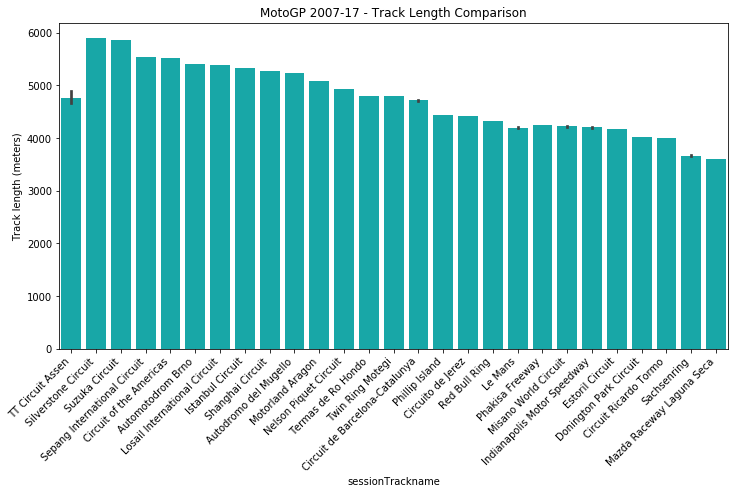

In [12]:
fig = generate_tracklenplot(dict_motogpdata)

In [13]:
fig.savefig('images/motogptracktemp.png', bbox_inches='tight', pad_inches=0.2)

What sort of temperatures have been recorded at each track over race sessions?

In [14]:
def generate_tracktempplot(dict_motodata):
    """ """

    df_tempsession = dict_motodata['session'][dict_motodata['session']['sessionSession'] == 'RAC']

    df_tempsession = df_tempsession.sort_values(by='sessionAirtemp',
                                                ascending=False)

    plt.clf()

    fig = plt.figure(figsize=(12, 6))

    ax = sns.barplot(x='sessionTrackname',
                     y='sessionAirtemp',
                     data=df_tempsession, color='c')

    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45, ha='right')

    ax.set_title('MotoGP 2007-17 - Track Air Temperature Comparison')
    ax.set_ylabel('Air temperature at track (degrees celsius)')

    return fig

<Figure size 432x288 with 0 Axes>

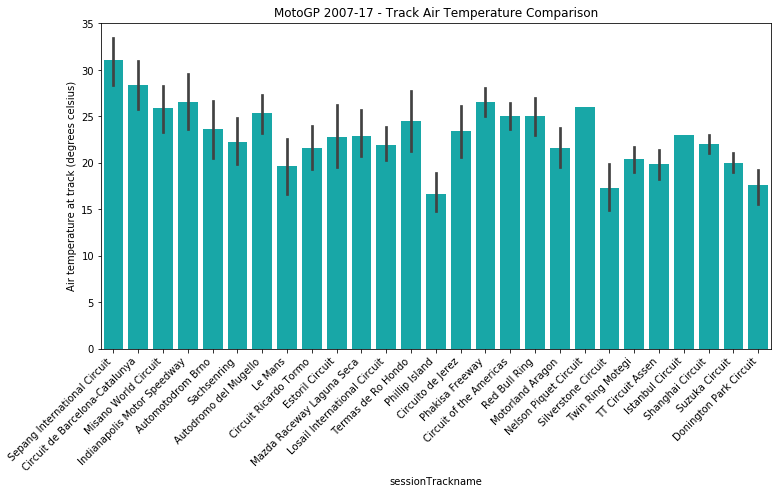

In [15]:
fig = generate_tracktempplot(dict_motogpdata)

In [16]:
fig.savefig('images/motogptracktemp.png', bbox_inches='tight', pad_inches=0.2)

Can we get a snapsot of riders best lap times recorded over some targeted sessions? Let's say, free practice sessions at Phillip Island in 2014.

In [17]:
def convertdatetime(dt):
    """ """

    import re
    import numpy as np

    from datetime import datetime

    dt = str(dt)

    if dt == 'None':
        return np.NaN

    else:
        f = '\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.\d{6}'
        r = re.compile(f)
        if r.match(dt) is None:
            dt = dt + '.000000'

        try:
            f = '%Y-%m-%d %H:%M:%S.%f'
            a = datetime.strptime(dt, f)
            b = datetime(1900, 1, 1)
        except:
            return np.NaN

        return (a - b).total_seconds()

    
def generate_fptimeplot(dict_motogpdata, year, track):
    """ """

    df_motogpsession = dict_motogpdata['session']

    df_motogpsessionfp = df_motogpsession[(df_motogpsession['sessionTrackname'] == track) & \
                                          (df_motogpsession['sessionSeason'] == year) & \
                                          (df_motogpsession['sessionSession'].isin(['FP1', 'FP2', 'FP3', 'FP4']))]
    
    df_motogpqresult = dict_motogpdata['qresult']

    df_motogpqresultfp = df_motogpqresult[df_motogpqresult['sessionId'].isin(df_motogpsessionfp['sessionId'])]
    df_motogpqresultfp = df_motogpqresultfp[['riderId', 'sessionId', 'qresultBesttime']]
    df_motogpqresultfp = df_motogpqresultfp.set_index('riderId')

    dict_sessionidsession = dict_motogpdata['session'].set_index('sessionId')['sessionSession'].to_dict()
    df_motogpqresultfp['sessionId'] = df_motogpqresultfp['sessionId'].replace(dict_sessionidsession)
    df_motogpqresultfp['qresultBesttime'] = df_motogpqresultfp.apply(lambda row: convertdatetime(row[1]), axis=1)

    plt.clf()

    fig = plt.figure(figsize=(12, 6))

    ax = sns.boxplot(x='sessionId',
                     y='qresultBesttime',
                     data=df_motogpqresultfp)

    ax.set_title('MotoGP ' + str(year) + ' - ' + track + ' Free Practice Session Times')
    ax.set_ylabel('Riders Best Lap Time (seconds)')
    ax.set_xlabel('Session')

    return fig

<Figure size 432x288 with 0 Axes>

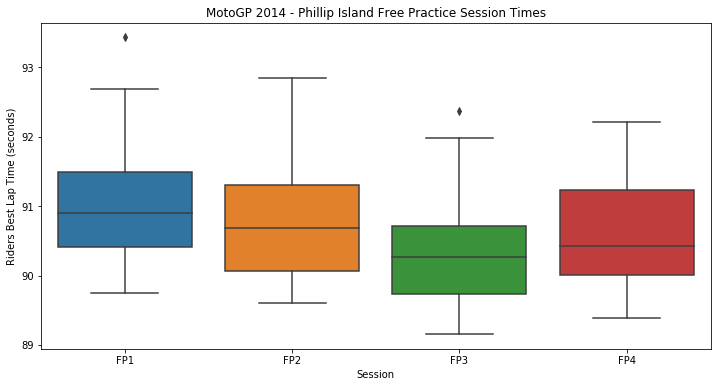

In [18]:
fig = generate_fptimeplot(dict_motogpdata, 2014, 'Phillip Island')

In [19]:
fig.savefig('images/motogpfpt.png', bbox_inches='tight', pad_inches=0.2)

Let's take a closer look at the championship progression over 2017

In [20]:
def generate_raceresults(dict_motodata, year):
    """ """

    df_motosession = dict_motodata['session']
    df_motorresult = dict_motodata['rresult']
    df_motorider = dict_motodata['rider']

    df_motosessionyr = df_motosession[(df_motosession['sessionSeason'] == year)]
    df_motorresultyr = df_motorresult[df_motorresult['sessionId'].isin(df_motosessionyr['sessionId'])]

    list_motorresultyrid = df_motorresultyr['sessionId'].unique()
    dict_rideridname = df_motorider.set_index('riderId')['riderName'].to_dict()

    dict_sessionidcountry = df_motosession.set_index('sessionId')['sessionCountry'].to_dict()

    df_raceresults = pd.DataFrame([])

    for i in list_motorresultyrid:
        df_temprresult = df_motorresultyr[df_motorresultyr['sessionId'] == i][['riderId', 'rresultPlace']]
        df_temprresult = df_temprresult[['riderId', 'rresultPlace']].replace({'riderId': dict_rideridname})
        df_temprresult = df_temprresult.set_index('riderId')
        df_temprresult.columns = [i]
        df_raceresults = pd.concat([df_raceresults, df_temprresult], axis=1, sort=False)

    df_raceresults = df_raceresults.rename(columns=dict_sessionidcountry)
    df_raceresults = df_raceresults.replace(np.nan, 'DNF', regex=True)

    return df_raceresults

In [21]:
df_raceresults = generate_raceresults(dict_motogpdata, 2017)

df_raceresults

,QAT,ARG,AME,SPA,FRA,ITA,CAT,NED,GER,CZE,AUT,GBR,RSM,ARA,JPN,AUS,MAL,VAL
Maverick VIALES,1,1,DNF,6,1,2,10,DNF,4,3,6,2,4,4,9,3,9,12
Andrea DOVIZIOSO,2,DNF,6,5,4,1,1,5,8,6,1,1,3,7,1,13,1,DNF
Valentino ROSSI,3,2,2,10,DNF,4,8,1,5,4,7,3,DNF,5,DNF,2,7,5
Marc MARQUEZ,4,DNF,1,2,DNF,6,2,3,1,1,2,DNF,1,1,2,1,4,3
Dani PEDROSA,5,DNF,3,1,3,DNF,3,13,3,2,3,7,14,2,DNF,12,5,1
Aleix ESPARGARO,6,DNF,17,9,DNF,DNF,DNF,10,7,8,13,DNF,DNF,6,7,DNF,DNF,DNF
Scott REDDING,7,8,12,11,DNF,12,13,DNF,20,16,12,8,7,14,16,11,13,DNF
Jack MILLER,8,9,10,DNF,8,15,DNF,6,15,14,DNF,16,6,13,DNF,7,8,7
Alex RINS,9,DNF,DNF,DNF,DNF,DNF,DNF,17,21,11,16,9,8,17,5,8,DNF,4
Jonas FOLGER,10,6,11,8,7,13,6,DNF,2,10,DNF,DNF,9,16,DNF,DNF,DNF,DNF


In [22]:
def generate_champpoints(dict_motodata, year):
    """ """

    dict_champpoints = {1: 25, 2: 20, 3: 16, 4: 13, 5: 11, 6: 10, 7: 9, 8: 8, 9: 7, 10: 6,
                        11: 5, 12: 4, 13: 3, 14: 2, 15: 1, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0,
                        21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0,
                        31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0}

    df_champpoints = generate_raceresults(dict_motodata, year)

    df_champpoints = df_champpoints.replace('DNF', np.nan, regex=True)
    df_champpoints = df_champpoints.replace(dict_champpoints)
    df_champpoints['Total'] = df_champpoints.sum(axis=1)
    df_champpoints = df_champpoints.sort_values(by='Total', ascending=False)
    df_champpoints = df_champpoints.replace(np.nan, 'DNF', regex=True)

    return df_champpoints

In [23]:
df_champpoints = generate_champpoints(dict_motogpdata, 2017)

df_champpoints

,QAT,ARG,AME,SPA,FRA,ITA,CAT,NED,GER,CZE,AUT,GBR,RSM,ARA,JPN,AUS,MAL,VAL,Total
Marc MARQUEZ,13,DNF,25,20,DNF,10,20,16,25,25,20,DNF,25,25,20,25,13,16,298.0
Andrea DOVIZIOSO,20,DNF,10,11,13,25,25,11,8,10,25,25,16,9,25,3,25,DNF,261.0
Maverick VIALES,25,25,DNF,10,25,20,6,DNF,13,16,10,20,13,13,7,16,7,4,230.0
Dani PEDROSA,11,DNF,16,25,16,DNF,16,3,16,20,16,9,2,20,DNF,4,11,25,210.0
Valentino ROSSI,16,20,20,6,DNF,13,8,25,11,13,9,16,DNF,11,DNF,20,9,11,208.0
Johann ZARCO,DNF,11,11,13,20,9,11,2,7,4,11,10,1,7,8,13,16,20,174.0
Jorge LORENZO,5,DNF,7,16,10,8,13,1,5,1,13,11,DNF,16,10,1,20,DNF,137.0
Danilo PETRUCCI,DNF,9,8,9,DNF,16,DNF,20,4,9,DNF,DNF,20,0,16,0,10,3,124.0
Cal CRUTCHLOW,DNF,16,13,DNF,11,DNF,5,13,6,11,1,13,3,DNF,DNF,11,1,8,112.0
Jonas FOLGER,6,10,5,8,9,3,10,DNF,20,6,DNF,DNF,7,0,DNF,DNF,DNF,DNF,84.0


In [24]:
def generate_cumpoints(dict_motodata, year):
    """ """

    df_cumpoints = generate_champpoints(dict_motodata, year)

    df_cumpoints = df_cumpoints.drop('Total', 1)
    df_cumpoints = df_cumpoints.replace('DNF', np.nan, regex=True)
    df_cumpoints = df_cumpoints.replace(np.nan, 0, regex=True)
    df_cumpoints = df_cumpoints.cumsum(axis=1)
    df_cumpoints['Total'] = df_cumpoints.sum(axis=1)
    df_cumpoints = df_cumpoints.sort_values(by='Total', ascending=False)
    df_cumpoints = df_cumpoints.drop('Total', 1)
    df_cumpoints = df_cumpoints.sort_values(by='VAL', ascending=False)

    return df_cumpoints

In [25]:
df_cumpoints = generate_cumpoints(dict_motogpdata, 2017)

df_cumpoints

,QAT,ARG,AME,SPA,FRA,ITA,CAT,NED,GER,CZE,AUT,GBR,RSM,ARA,JPN,AUS,MAL,VAL
Marc MARQUEZ,13.0,13.0,38.0,58.0,58.0,68.0,88.0,104.0,129.0,154.0,174.0,174.0,199.0,224.0,244.0,269.0,282.0,298.0
Andrea DOVIZIOSO,20.0,20.0,30.0,41.0,54.0,79.0,104.0,115.0,123.0,133.0,158.0,183.0,199.0,208.0,233.0,236.0,261.0,261.0
Maverick VIALES,25.0,50.0,50.0,60.0,85.0,105.0,111.0,111.0,124.0,140.0,150.0,170.0,183.0,196.0,203.0,219.0,226.0,230.0
Dani PEDROSA,11.0,11.0,27.0,52.0,68.0,68.0,84.0,87.0,103.0,123.0,139.0,148.0,150.0,170.0,170.0,174.0,185.0,210.0
Valentino ROSSI,16.0,36.0,56.0,62.0,62.0,75.0,83.0,108.0,119.0,132.0,141.0,157.0,157.0,168.0,168.0,188.0,197.0,208.0
Johann ZARCO,0.0,11.0,22.0,35.0,55.0,64.0,75.0,77.0,84.0,88.0,99.0,109.0,110.0,117.0,125.0,138.0,154.0,174.0
Jorge LORENZO,5.0,5.0,12.0,28.0,38.0,46.0,59.0,60.0,65.0,66.0,79.0,90.0,90.0,106.0,116.0,117.0,137.0,137.0
Danilo PETRUCCI,0.0,9.0,17.0,26.0,26.0,42.0,42.0,62.0,66.0,75.0,75.0,75.0,95.0,95.0,111.0,111.0,121.0,124.0
Cal CRUTCHLOW,0.0,16.0,29.0,29.0,40.0,40.0,45.0,58.0,64.0,75.0,76.0,89.0,92.0,92.0,92.0,103.0,104.0,112.0
Jonas FOLGER,6.0,16.0,21.0,29.0,38.0,41.0,51.0,51.0,71.0,77.0,77.0,77.0,84.0,84.0,84.0,84.0,84.0,84.0


In [26]:
def generate_qualresults(dict_motogpdata, year):
    """ """

    def aggregateq1q2(q1, q2, n):
        if q1 > 2:
            return q1 + n
        else:
            return q2

    df_motogpsession = dict_motogpdata['session']
    df_motogpqresult = dict_motogpdata['qresult']
    df_motogprider = dict_motogpdata['rider']

    df_motogpsessionyr = df_motogpsession[(df_motogpsession['sessionSeason'] == year)]
    df_motogpqresultyr = df_motogpqresult[df_motogpqresult['sessionId'].isin(df_motogpsession['sessionId'])]

    list_motogpsessionid = df_motogpsessionyr[(df_motogpsessionyr['sessionSession'] == 'Q1') | \
                                              (df_motogpsessionyr['sessionSession'] == 'Q2')]['sessionId'].unique()

    dict_rideridname = df_motogprider.set_index('riderId')['riderName'].to_dict()
    dict_sessionidcountry = df_motogpsessionyr.set_index('sessionId')['sessionCountry'].to_dict()

    df_qualresults = pd.DataFrame([])

    for i in range(0, len(list_motogpsessionid), 2):
        df_temprresults = pd.DataFrame([])

        for j in range(0, 2):
            q = list_motogpsessionid[i + j]
            df_temprresult = df_motogpqresult[df_motogpqresult['sessionId'] == q][['riderId', 'qresultPlace']]
            df_temprresult = df_temprresult[['riderId', 'qresultPlace']].replace({'riderId': dict_rideridname})
            df_temprresult = df_temprresult.set_index('riderId')
            df_temprresult.columns = [q]

            df_temprresults = pd.concat([df_temprresults, df_temprresult], axis=1, sort=False)

        n = float(df_temprresults[[q]].max().values - 2)

        df_temprresults[q] = df_temprresults.apply(lambda row: aggregateq1q2(row[q - 1], row[q], n), axis=1)
        df_temprresults = df_temprresults.drop(q - 1, 1)

        df_qualresults = pd.concat([df_qualresults, df_temprresults], axis=1, sort=False)

    df_qualresults = df_qualresults.rename(columns=dict_sessionidcountry)
    df_qualresults = df_qualresults.replace(np.nan, 'DNQ', regex=True)

    return df_qualresults

In [27]:
df_qualresults = generate_qualresults(dict_motogpdata, 2017)

df_qualresults

,ARG,AME,SPA,FRA,ITA,CAT,NED,GER,CZE,AUT,GBR,RSM,ARA,JPN,AUS,MAL,VAL
Dani PEDROSA,5,4,1,13,5,1,12,3,3,8,7,7,6,6,12,1,5
Valentino ROSSI,7,3,7,2,2,13,4,9,2,7,2,DNQ,3,12,7,4,7
Andrea DOVIZIOSO,13,7,14,6,3,7,9,10,4,2,6,2,7,9,11,3,9
Johann ZARCO,14,5,6,3,11,14,1,19,10,6,8,6,11,1,3,2,2
Scott REDDING,15,10,11,7,20,11,5,23,23,15,12,19,22,22,20,14,22
Jorge LORENZO,16,6,8,16,7,2,21,6,6,3,5,5,2,5,16,6,4
Jack MILLER,17,12,10,11,19,15,13,13,15,19,17,14,13,DNQ,5,11,12
Pol ESPARGARO,18,21,15,8,18,20,19,7,18,16,11,17,14,8,6,12,11
Bradley SMITH,19,18,16,10,23,DNQ,22,15,19,22,19,22,23,7,9,16,17
Tito RABAT,20,16,18,22,10,19,23,24,21,24,22,18,21,19,14,19,14


In [28]:
def generate_cumpointplot(dict_motodata, year):
    """ """

    df_cumpoints = generate_cumpoints(dict_motodata, year)

    df_cumpointstop5 = df_cumpoints[:5].T
    df_cumpointstop5 = df_cumpointstop5.reset_index()

    list_sessioncountry = df_cumpointstop5['index'].tolist()
    df_cumpointstop5 = df_cumpointstop5.drop('index', 1)

    plt.clf()

    fig = df_cumpointstop5.plot(figsize=(16, 8))

    plt.xticks(np.arange(0, len(df_cumpointstop5)), list_sessioncountry)
    plt.title('MotoGP ' + str(year) + ' Cumulative Championship Points (top 5 riders)')
    plt.ylabel('Cumulative Championship Points')
    plt.xlabel('Session Country')
    plt.legend()

    return fig

<Figure size 432x288 with 0 Axes>

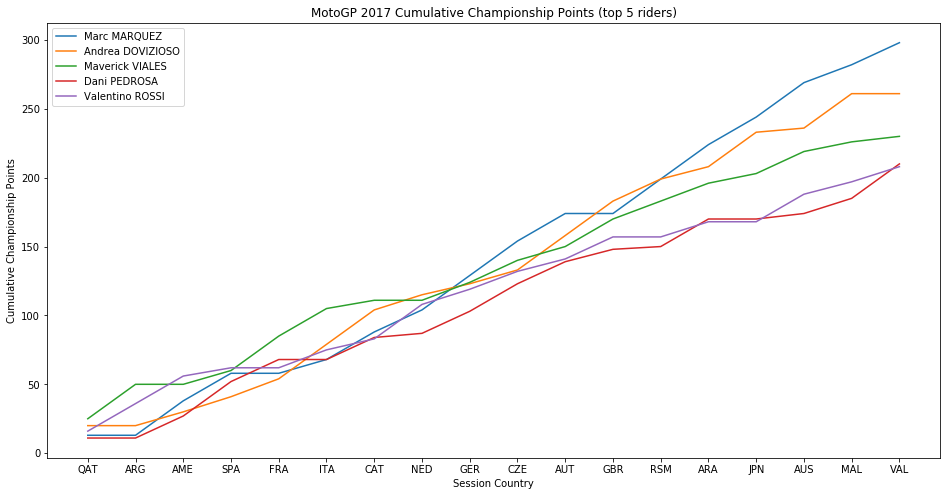

In [29]:
fig = generate_cumpointplot(dict_motogpdata, 2017)

In [30]:
fig = fig.get_figure()
fig.savefig('images/motogpcumpoint.png', bbox_inches='tight', pad_inches=0.2)